In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/.dependencies/pyplot-perso/")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
datapath = git_path + "/.dependencies/gromacstutorials-inputs/"+level+"/"

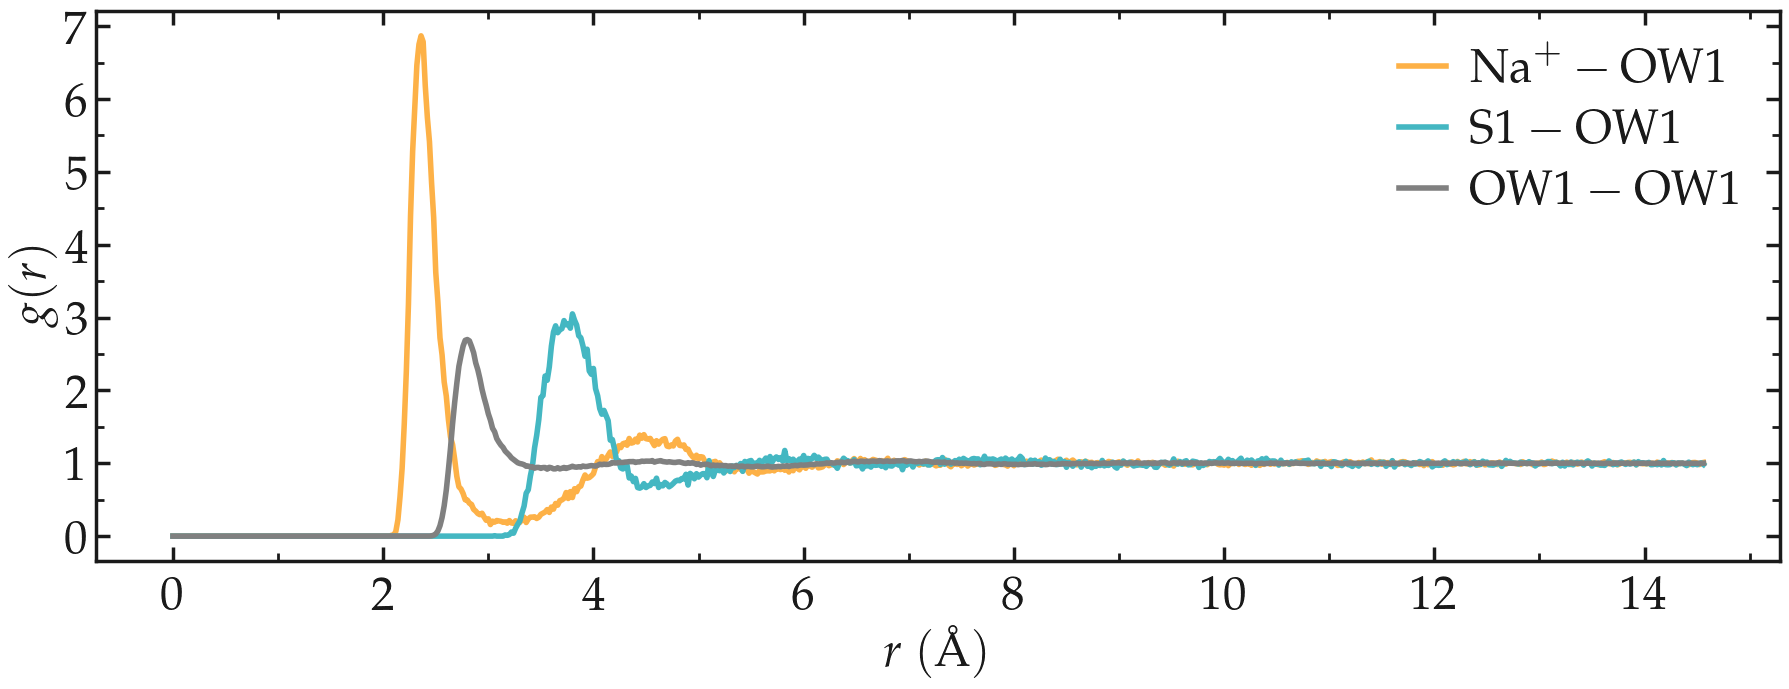

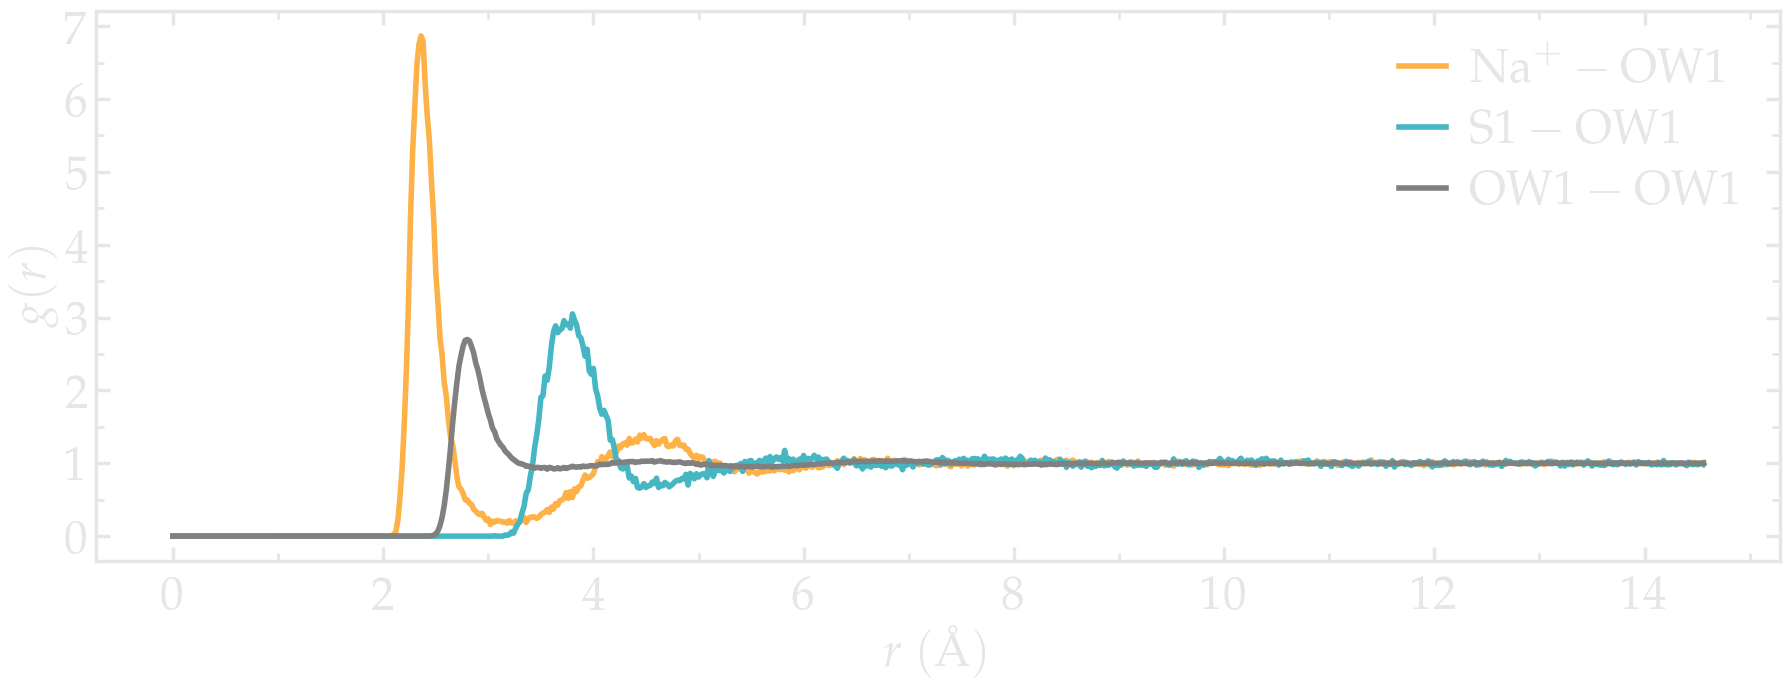

In [13]:
filename = "rdf-filtered"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,7), dark_mode = dark_mode,
                        transparency = True, use_serif=True)
    myplt.add_panel()
    r, gr = np.loadtxt(datapath + "production-rdf-na-OW1.xvg", skiprows=25).T
    myplt.add_plot(x = r*10, y = gr, linewidth = 3,
                   marker = "-", data_color = 1, markersize = 12,
                   data_label = r"$\mathrm{Na}^+-\mathrm{OW1}$")
    r, gr = np.loadtxt(datapath + "production-rdf-so4-OW1.xvg", skiprows=25).T
    myplt.add_plot(x = r*10, y = gr, linewidth = 3,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label= r"$\mathrm{S1}-\mathrm{OW1}$")
    r, gr = np.loadtxt(datapath + "production-rdf-OW1-OW1.xvg", skiprows=25).T
    myplt.add_plot(x = r*10, y = gr, linewidth = 3,
                   marker = "-", data_color = np.array([0.5, 0.5, 0.5]), markersize = 12,
                   data_label= r"$\mathrm{OW1}-\mathrm{OW1}$")
    myplt.complete_panel(xlabel = r'$r ~ \mathrm{(\AA{})}$', ylabel = r'$g(r)$',
                         xpad = 10, legend=True, handlelength_legend=1)
    # myplt.set_boundaries(x_ticks=np.arange(0, 6.1, 1), x_boundaries=(0, 6.1),
    #                      y_ticks=np.arange(-1., 1.25, 0.5), y_boundaries=(-1.055, 1.055))
    myplt.save_figure(filename = filename, saving_path = './')